In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from keras.datasets import mnist

from sklearn.datasets import load_iris
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, classification_report, plot_roc_curve, roc_auc_score, accuracy_score

In [8]:
X, y = load_iris(return_X_y=True)
print(X.shape, y.shape)

(150, 4) (150,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [ ]:
# Split the Iris dataset into train and test set with 70:30 ratio
# Import svm.SVC as 'model'
# kernels = ['linear' , 'rbf']
# Regularization = [1,15,25]
# gamma = 'auto'
# Cross Validation = 4

# Q1

In [16]:
def compute_GridSearchCV(kernel, reg_params) :
    if(kernel == "rbf") :
        C_range = reg_params
        param_grid = dict(gamma=['auto'], C=C_range)        
        
        grid = GridSearchCV(SVC(kernel='rbf', random_state=0), param_grid=param_grid, cv=4)
        grid.fit(X_train, y_train)
        return grid.best_score_
    
    elif(kernel == "linear") :
        C_range = reg_params
        param_grid = dict(C=C_range)  
        grid = GridSearchCV(SVC(kernel='linear', random_state=0), param_grid=param_grid, cv=4)
        grid.fit(X_train, y_train)
        return grid.best_score_
        
print(compute_GridSearchCV("linear", [1,15,25]))
print(compute_GridSearchCV("rbf", [1,15,25]))


0.9807692307692308
0.9711538461538461


# Q2 and Q3

In [124]:
df = pd.read_csv("sna.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [125]:
X = df.iloc[:, :2].to_numpy()
y = df.iloc[:, -1:].to_numpy()

print(X.shape, y.shape)

(400, 2) (400, 1)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(300, 2) (100, 2) (300, 1) (100, 1)


In [127]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lin_svm', SVC(kernel="linear", random_state=0))
])

pipe.fit(X_train, y_train)

C:\Users\Vishvam\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', StandardScaler()),
                ('lin_svm', SVC(kernel='linear', random_state=0))])

In [129]:
y_pred = pipe.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

# acc = cross_val_score(pipe, X_train, y_train)
# print(f'Training accuracy: {acc.mean() * 100: .2f} %')

# acc = cross_val_score(pipe, X_test, y_test)
# print(f'Testing accuracy: {acc.mean() * 100: .2f} %')

0.9


[[66  2]
 [ 8 24]]


Text(0.5, 1.0, 'Confusion Matrix')

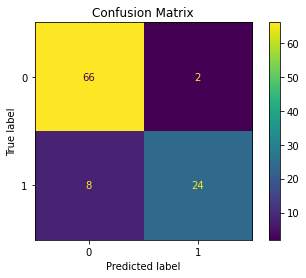

In [130]:
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix')

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



# Q7

In [2]:
X, y = load_iris(return_X_y=True)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 4) (150,)
(105, 4) (45, 4) (105,) (45,)


In [3]:
clf = SVC(kernel="poly", C=10, gamma="auto")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.9777777777777777


In [4]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Q6

In [ ]:
# Consider the MNIST dataset, split it into training and test set in 50:50 ratio with random_state = 42. Fit a SVM model using pipeline with StandardScalar, SVM classifier kernel='poly' and degree = 3, decision_function_shape='ovr'and class_weight='balanced', C=10. Train the model on training data, and make predictions for test data. Generate the Classification report and choose the correct value for weighted avg of f1_score.

In [17]:
(X_tr, y_tr), (X_te, y_te) = mnist.load_data()
print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [38]:
X_tr1 = X_tr.reshape(X_tr.shape[0], 28 * 28)
X_te1 = X_te.reshape(X_te.shape[0], 28 * 28)

X = np.vstack((X_tr1, X_te1))
y = np.hstack((y_tr, y_te))
print(X.shape, y.shape)

# Normalizing
# X = X/255

(70000, 784) (70000,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train = X_train[:10000, :]  # Consider the first 10K images in train
X_test = X_test[:2000, :]  # Consider the first 2K images in test
y_train = y_train[:10000]
y_test = y_test[:2000]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35000, 784) (35000, 784) (35000,) (35000,)
(10000, 784) (2000, 784) (10000,) (2000,)


In [40]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel="poly", degree=3, decision_function_shape="ovr", class_weight='balanced', C=10))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVC(C=10, class_weight='balanced', kernel='poly'))])

In [41]:
y_pred = pipe.predict(X_test)

[[184   0   0   0   1   1   1   0   2   0]
 [  0 214   1   1   0   0   0   0   0   0]
 [  1   2 173   1   3   0   1   1   8   0]
 [  0   0   3 210   0   5   0   0   6   6]
 [  0   0   1   0 153   0   0   1   0   3]
 [  0   0   0   2   0 195   1   0   2   0]
 [  1   0   0   0   1   3 199   0   1   0]
 [  1   2   0   0   7   0   0 186   0   8]
 [  1   0   2   2   1   2   1   0 189   2]
 [  0   1   2   2   3   1   0   3   4 192]]


Text(0.5, 1.0, 'Confusion Matrix')

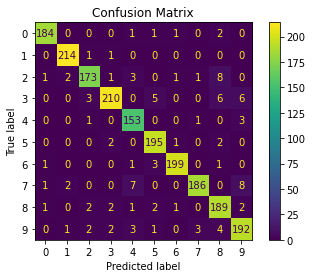

In [42]:
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix')

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       189
           1       0.98      0.99      0.98       216
           2       0.95      0.91      0.93       190
           3       0.96      0.91      0.94       230
           4       0.91      0.97      0.94       158
           5       0.94      0.97      0.96       200
           6       0.98      0.97      0.98       205
           7       0.97      0.91      0.94       204
           8       0.89      0.94      0.92       200
           9       0.91      0.92      0.92       208

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



# Q4 and Q5

In [ ]:
# From the MNIST dataset, consider the first 20,000 data samples as training data and the next 5,000 data samples as test data. Fit a pipeline with MinMaxScaler and a classifier with SVC, linear kernel, one vs rest decision_function_shape and class_weight=None to this dataset and answer the following questions(Q.no 4 and Q.no 5).

In [45]:
(X_tr, y_tr), (X_te, y_te) = mnist.load_data()
print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)

X_tr1 = X_tr.reshape(X_tr.shape[0], 28 * 28)
X_te1 = X_te.reshape(X_te.shape[0], 28 * 28)

X = np.vstack((X_tr1, X_te1))
y = np.hstack((y_tr, y_te))
print(X.shape, y.shape)

# Normalizing
# X = X/255

X_train = X[:20000, :]  # Consider the first 20K images in train
X_test = X[20000:25000, :]  # Consider the next 5K images in test
y_train = y[:20000]
y_test = y[20000:25000]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
(70000, 784) (70000,)
(20000, 784) (5000, 784) (20000,) (5000,)


In [47]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', SVC(kernel="linear", decision_function_shape="ovr", class_weight=None))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', SVC(kernel='linear'))])

In [49]:
y_pred = pipe.predict(X_test)

[[469   0   1   0   0   5   1   1   1   0]
 [  1 555   2   4   0   1   1   1   3   0]
 [  5   4 479   6   9   1   3   6   7   1]
 [  3   3  13 462   0  19   0   3   9   4]
 [  2   0   6   0 468   1   2   4   1  16]
 [ 14   0   0  18   2 405   3   2   7   9]
 [  1   2   2   0   6   9 471   0   0   0]
 [  0   2   4   1   7   1   0 483   0   6]
 [  3  10  11  15   0  19   6   3 396   3]
 [  3   6   1   2  21   0   0  26   2 435]]


Text(0.5, 1.0, 'Confusion Matrix')

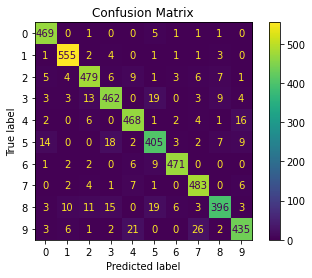

In [50]:
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix')

In [51]:
print("Trace of Confusion Matrix : ", np.trace(cm))

Trace of Confusion Matrix :  4623


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       478
           1       0.95      0.98      0.97       568
           2       0.92      0.92      0.92       521
           3       0.91      0.90      0.90       516
           4       0.91      0.94      0.92       500
           5       0.88      0.88      0.88       460
           6       0.97      0.96      0.96       491
           7       0.91      0.96      0.94       504
           8       0.93      0.85      0.89       466
           9       0.92      0.88      0.90       496

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



# Q8

In [ ]:
# Split the Iris dataset into train and test set with 70:30 ratio
# Import svm.SVC as 'model'
# kernel as 'sigmoid', regularization parameter as 25 and gamma as 'auto'
# Train the 'model' and mark the computed 'score'

In [53]:
X, y = load_iris(return_X_y=True)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 4) (150,)
(105, 4) (45, 4) (105,) (45,)


In [55]:
clf = SVC(kernel="sigmoid", C=25, gamma="auto")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.28888888888888886


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        13
           2       0.29      1.00      0.45        13

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45



C:\Users\Vishvam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vishvam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vishvam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Q9

In [ ]:
# Import the iris dataset and drop the rows where class=Iris-setosa. Apply a pipeline containing a MinMaxScaler()function called Scaler and a svm.svc() called classifier. Split the iris dataset into 75:25 ratio with random_state=0. Mark the correct precision score. 

In [120]:
iris = load_iris()

df1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

mask = ~(df1["target"] == 0)

df = df1.loc[mask]

X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1:].to_numpy()

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 4) (100, 1)
(75, 4) (25, 4) (75, 1) (25, 1)


In [121]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', SVC())
])

pipe.fit(X_train, y_train)

C:\Users\Vishvam\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', SVC())])

In [122]:
y_pred = pipe.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.92


In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      0.85      0.92        13
         2.0       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



In [ ]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.vstack((a,b))
print(c)